# End-to-End Project Using Machine Learning

<p>Let us take a case study of a <b>house price prediction</b> using Machine Learning<br>
We will start this project from data preprocessing, cleaning and then move to Machine Learning and will make predictions.</p>
<br>
<b>So, Let's Start...!!!!<b>

## Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# Summary of a dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Display a single column using dataframe.
# Single column is known as a series
data['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

In [5]:
# count the number of unique values in each column
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
# Will give error, because in DataFrame has no attribute unique(), means not apply in entire data set unique keywords
# data.unique()

In [7]:
# count of total number of unique values in one column
data['ocean_proximity'].nunique()

5

In [8]:
# returns an array of unique values
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
# count of the total values (per category) 
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# description of data of numeric columns  --> This is called as descriptive statistics
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizing all columns

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

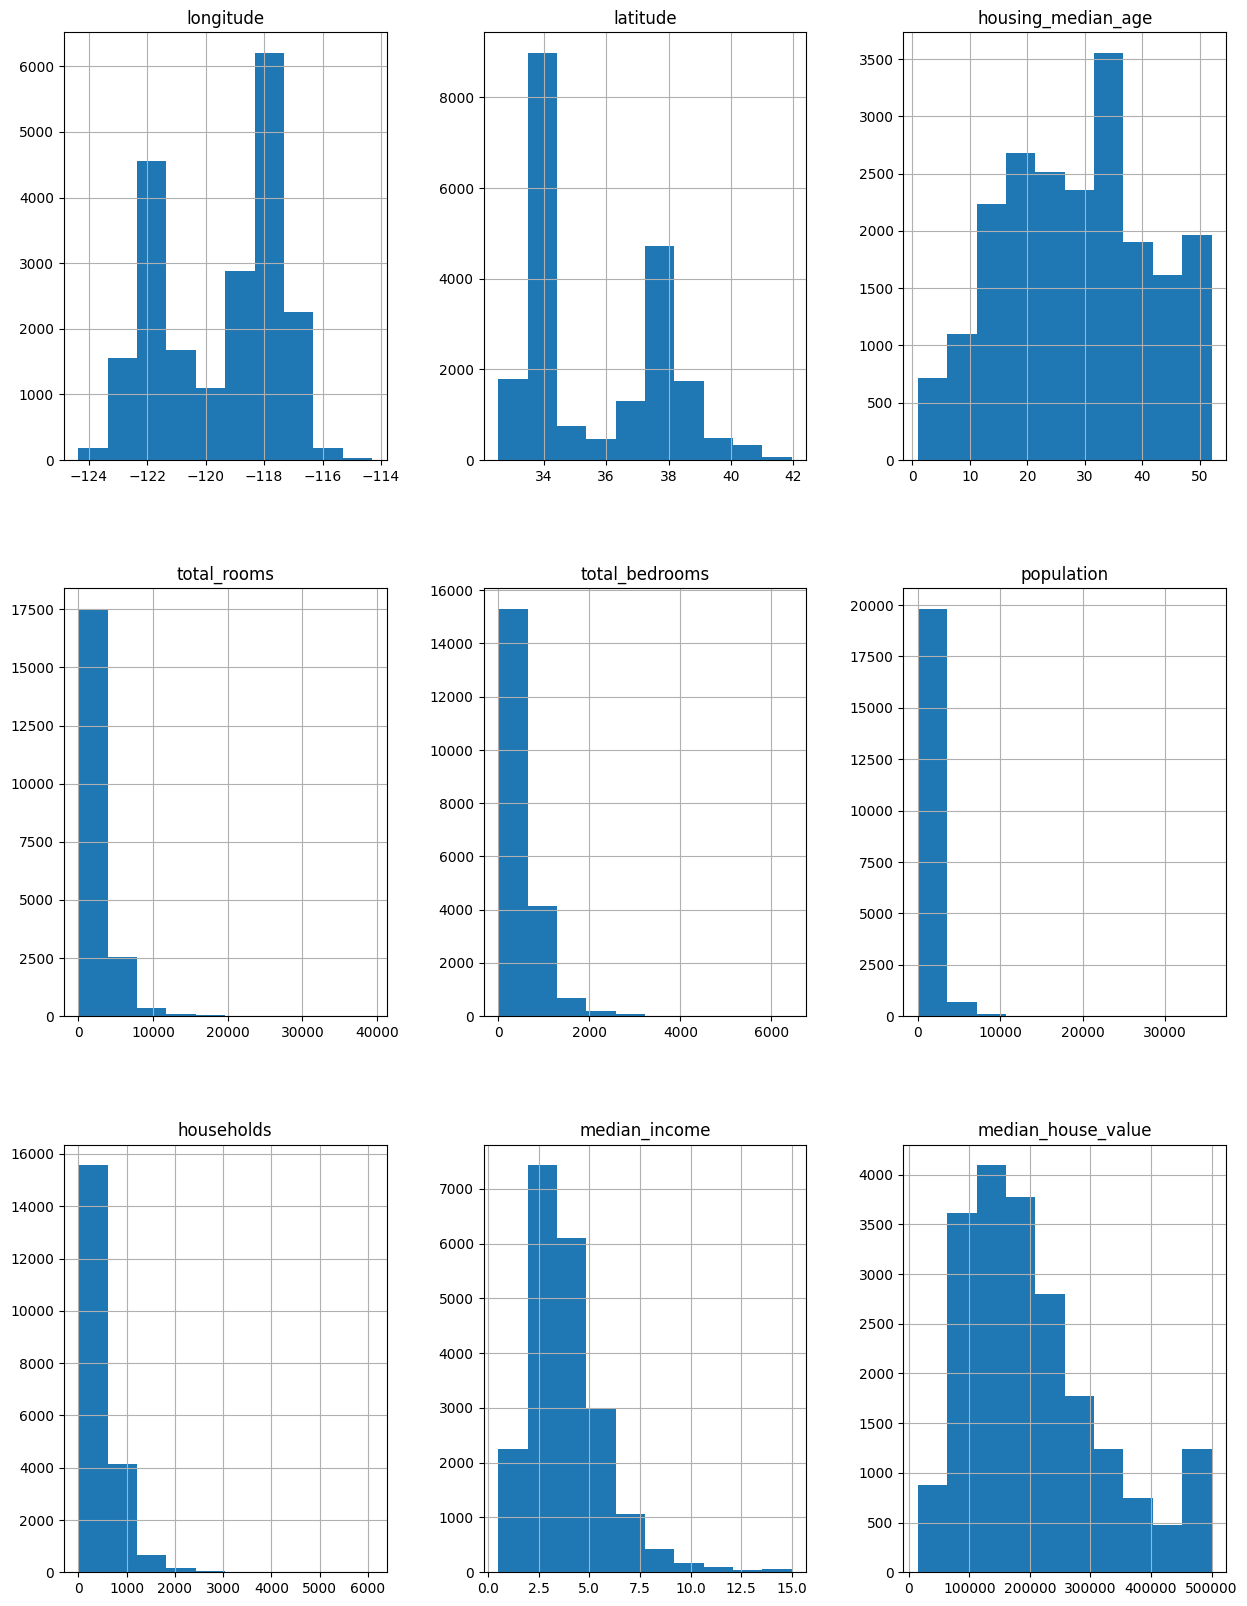

In [11]:
data.hist(bins=10, figsize=(15,20))
#plt.show()  # .show() is nothing basically remove the string information 

In [12]:
# find a correlation between all numeric columns
# iloc - implicit location (uses implicit indexing)
data.iloc[:,:-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [13]:
# finding out the correlation of median income
data.iloc[:,:-1].corr()['median_income']

longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
total_rooms           0.198050
total_bedrooms       -0.007723
population            0.004834
households            0.013033
median_income         1.000000
median_house_value    0.688075
Name: median_income, dtype: float64

----------------------

## Categorizing a numerical attribute for Stratified Splitting

In [14]:
data['median_income'].head(10)

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
5    4.0368
6    3.6591
7    3.1200
8    2.0804
9    3.6912
Name: median_income, dtype: float64

In [15]:
data['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

<Axes: >

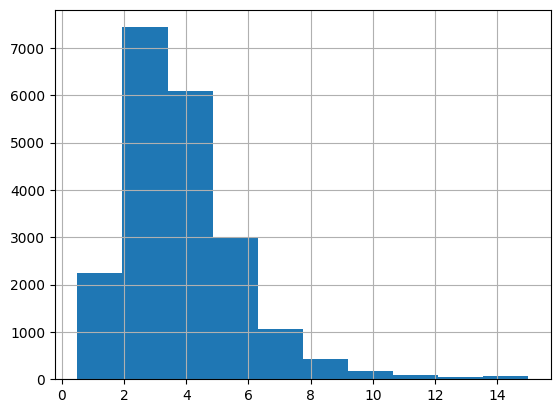

In [16]:
data['median_income'].hist()

In [17]:
# minimun value of median income column
data['median_income'].min()

0.4999

In [18]:
# maximum value for median income column
data['median_income'].max()

15.0001

In [19]:
# sorting column values into bins
# pd.cut --> convert continuous numerical data into categorical data

data['income_category'] = pd.cut(data['median_income'], bins=[0,2,3,4.5,6.2,11,np.inf], labels=[1,2,3,4,5,6])
data['income_category'].head(10)

0    5
1    5
2    5
3    4
4    3
5    3
6    3
7    3
8    2
9    3
Name: income_category, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [20]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [21]:
data['income_category'].value_counts()

income_category
3    7236
2    4946
4    3992
1    2457
5    1851
6     158
Name: count, dtype: int64

<Axes: xlabel='income_category'>

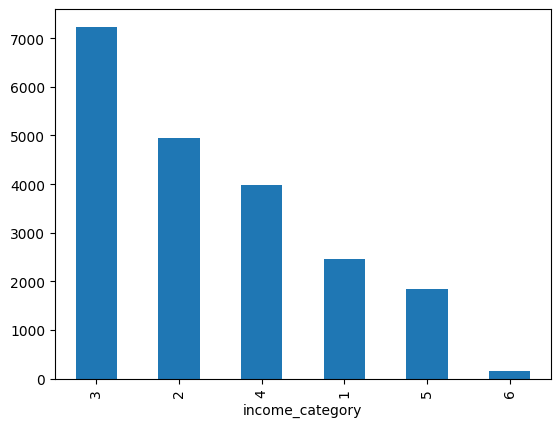

In [22]:
data['income_category'].value_counts().plot.bar()

### Our Own Train-Test Split Method

In [23]:
def my_train_test_split(data, ratio, seed):
    
    np.random.seed(seed)
    
    shuffled_indices = np.random.permutation(len(data))
    
    train_ratio = round(len(shuffled_indices)*ratio)
    
    train_data = data.iloc[shuffled_indices[:train_ratio]]
    test_data = data.iloc[shuffled_indices[train_ratio:]]
    
    return train_data, test_data

In [24]:
train_data, test_data = my_train_test_split(data, 0.8, 42)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,1
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
20011,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0,INLAND,2
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0,INLAND,2
1051,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0,INLAND,3
14519,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0,<1H OCEAN,3


In [26]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
9221,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0,INLAND,2
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0,<1H OCEAN,2
4763,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0,<1H OCEAN,2
9062,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0,INLAND,3
1874,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,4


In [27]:
train_data.shape, test_data.shape

((16512, 11), (4128, 11))

In [28]:
train_data.index

Index([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,  5723,
       ...
         307, 19205, 17626, 12580, 19532, 20011, 12225,  1051, 14519, 11410],
      dtype='int64', length=16512)

In [29]:
test_data.index

Index([ 9221, 10234,  4763,  9062,  1874, 16816, 13682, 19906,  5831, 18652,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=4128)

In [30]:
train_data["income_category"].value_counts(normalize=True)

income_category
3    0.350230
2    0.242127
4    0.193738
1    0.117430
5    0.088844
6    0.007631
Name: proportion, dtype: float64

In [31]:
test_data["income_category"].value_counts(normalize=True)

income_category
3    0.351986
2    0.229651
4    0.192103
1    0.125484
5    0.093023
6    0.007752
Name: proportion, dtype: float64

### Stratified Splitting

<p>Splits the dataset into train and test set while maintaining the same class distribution between the train and test sets</p>

<h5>sklearn.model_selection:</h5>
Module in Scikit-learn that provides tools for model selection and evaluation.<br>
It includes various functions and classes for tasks such as splitting datasets into train/test sets,<br>
cross-validation, parameter tuning, and performance evaluation.<br>

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [33]:
# strat_split.split?

In [34]:
# splitting data based on income category column
# it returns a generator object

genObj = strat_split.split(data, data['income_category'])

In [35]:
genObj

<generator object BaseShuffleSplit.split at 0x0000020E279F1F40>

In [36]:
type(strat_split.split(data, data['income_category']))

generator

In [37]:
IndexList = next(genObj)

In [38]:
IndexList

(array([10237,  1290, 11221, ..., 16080, 16365,  6888], dtype=int64),
 array([17428, 15123, 14508, ..., 10778,  9836,  6748], dtype=int64))

In [39]:
IndexList[0], IndexList[1]

(array([10237,  1290, 11221, ..., 16080, 16365,  6888], dtype=int64),
 array([17428, 15123, 14508, ..., 10778,  9836,  6748], dtype=int64))

In [40]:
strat_trainSet = data.iloc[IndexList[0]]
strat_testSet = data.iloc[IndexList[1]]

In [41]:
strat_trainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,3
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,3
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,3
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,2


In [42]:
strat_testSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN,3
15123,-116.94,32.83,38.0,1701.0,317.0,872.0,304.0,3.7831,147800.0,<1H OCEAN,3
14508,-117.20,32.86,4.0,4308.0,1095.0,1923.0,932.0,3.9356,267000.0,NEAR OCEAN,3
12599,-121.49,38.53,42.0,1468.0,281.0,571.0,271.0,3.3906,124200.0,INLAND,3
9001,-118.34,33.99,47.0,1107.0,199.0,437.0,178.0,3.7344,179400.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
16420,-121.29,37.89,26.0,161.0,27.0,1542.0,30.0,5.7485,162500.0,INLAND,4
12195,-117.28,33.66,15.0,4573.0,928.0,2513.0,832.0,2.6949,163600.0,<1H OCEAN,2
10778,-117.90,33.65,30.0,1634.0,373.0,771.0,364.0,3.4125,284100.0,<1H OCEAN,3
9836,-121.89,36.63,20.0,1834.0,554.0,971.0,514.0,3.0383,217300.0,<1H OCEAN,3


In [43]:
strat_trainSet.shape,strat_testSet.shape

((16512, 11), (4128, 11))

In [44]:
strat_trainSet["income_category"].value_counts()/len(strat_trainSet)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: count, dtype: float64

In [45]:
strat_testSet["income_category"].value_counts(normalize=True)

income_category
3    0.350533
2    0.239583
4    0.193314
1    0.119186
5    0.089632
6    0.007752
Name: proportion, dtype: float64

In [46]:
data["income_category"].value_counts(normalize=True)

income_category
3    0.350581
2    0.239632
4    0.193411
1    0.119041
5    0.089680
6    0.007655
Name: proportion, dtype: float64

In [47]:
for d in (strat_trainSet, strat_testSet):
    d.drop('income_category', axis=1, inplace=True)
    

C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\3030151181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop('income_category', axis=1, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\3030151181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop('income_category', axis=1, inplace=True)


In [48]:
strat_trainSet.head(), strat_testSet.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 10237    -117.87     33.91                16.0       2434.0           455.0   
 1290     -121.79     38.00                34.0       3090.0           593.0   
 11221    -117.90     33.80                23.0       1368.0           397.0   
 20394    -118.87     34.22                14.0       3108.0           451.0   
 7336     -118.15     33.98                37.0       1184.0           290.0   
 
        population  households  median_income  median_house_value  \
 10237      1017.0       476.0         4.2188            176300.0   
 1290       1588.0       566.0         3.6118            124700.0   
 11221      1940.0       358.0         3.0789            350000.0   
 20394      1566.0       434.0         6.2423            305400.0   
 7336       1320.0       276.0         2.3000            165600.0   
 
       ocean_proximity  
 10237       <1H OCEAN  
 1290           INLAND  
 11221       <1H OCEAN  
 2

--------------------------------------------------------------------------------------------

## Dealing with Categorical Features(columns)

In [49]:
strat_trainSet_category =  strat_trainSet['ocean_proximity'] 

In [50]:
strat_testSet_category =  strat_testSet['ocean_proximity']

In [51]:
strat_trainSet_cat_array = np.array(strat_trainSet_category).reshape(-1,1)

In [52]:
strat_trainSet_cat_array

array([['<1H OCEAN'],
       ['INLAND'],
       ['<1H OCEAN'],
       ...,
       ['NEAR OCEAN'],
       ['INLAND'],
       ['<1H OCEAN']], dtype=object)

### One Hot Encoding
<p>Technique used to represent categorical variables as numerical values in a machine learning model.<br>One-hot encoding converts categorical variables into a binary vector representation.</p>

<p><b>fit_transform()-</b><br>
It combines the fitting and transforming steps into a single operation.<br> 
It learns the structure of the categorical data (fitting) and then transforms the data<br>
into a numerical representation (transforming) suitable for machine learning algorithms.</p>

fit method analyzes the data and learns parameters necessary for subsequent transformations.

In [53]:
from sklearn.preprocessing import OneHotEncoder
category_encoder = OneHotEncoder()
strat_trainSet_cat_encoder = category_encoder.fit_transform(strat_trainSet_cat_array)

In [54]:
category_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [55]:
strat_trainSet_cat_encoder

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
strat_trainSet_cat_encoder.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [57]:
strat_trainSet[category_encoder.categories_[0]] = strat_trainSet_cat_encoder.toarray()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\1062957019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[category_encoder.categories_[0]] = strat_trainSet_cat_encoder.toarray()
C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\1062957019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[category_encoder.categories_[0]] = strat_trainSet_cat_encoder.toarray()
C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\1062957019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a

In [58]:
strat_trainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND,0.0,1.0,0.0,0.0,0.0


In [59]:
strat_trainSet.drop('ocean_proximity', axis=1, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\2158065313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet.drop('ocean_proximity', axis=1, inplace=True)


In [60]:
strat_trainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,-117.20,32.80,34.0,4854.0,912.0,2089.0,854.0,3.8542,200000.0,0.0,0.0,0.0,0.0,1.0
8945,-118.47,34.01,27.0,1782.0,471.0,837.0,422.0,3.7727,413000.0,1.0,0.0,0.0,0.0,0.0
16080,-122.49,37.74,52.0,2442.0,449.0,1188.0,436.0,4.3909,317700.0,0.0,0.0,0.0,0.0,1.0
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,0.0,1.0,0.0,0.0,0.0


------------

## Handling Nulls

In [61]:
strat_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 10237 to 6888
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   <1H OCEAN           16512 non-null  float64
 10  INLAND              16512 non-null  float64
 11  ISLAND              16512 non-null  float64
 12  NEAR BAY            16512 non-null  float64
 13  NEAR OCEAN          16512 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


In [62]:
# isna() is used to check null values
strat_trainSet.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1290,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11221,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20394,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7336,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16365,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
# isnull can also be used
strat_trainSet.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1290,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11221,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20394,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7336,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16365,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
# sum function returns the count of total null values
strat_trainSet.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        165
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [65]:
# missing values can be checked on a single column too 
strat_trainSet['total_bedrooms'].isna().sum()

165

<h3>Filling Missing Values</h3>

In [66]:
df_null = strat_trainSet.isna()

In [67]:
df_null[df_null['total_bedrooms'] == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6541,False,False,False,False,True,False,False,False,False,False,False,False,False,False
13656,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,True,False,False,False,False,False,False,False,False,False
15607,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,False,False,False,False,True,False,False,False,False,False,False,False,False,False
10761,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7228,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9970,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [68]:
isna_index = (df_null[df_null['total_bedrooms']==True]).index
isna_index

Index([ 6253,  6541, 13656,  4743, 15607, 20460, 10216, 10033, 12101, 14015,
       ...
       19122, 13933,  8383,  3482, 20372, 18332, 10761,  7228,  9970,  5216],
      dtype='int64', length=165)

In [69]:
strat_trainSet.loc[isna_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,1.0,0.0,0.0,0.0,0.0
6541,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,1.0,0.0,0.0,0.0,0.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,0.0,1.0,0.0,0.0,0.0
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,202100.0,1.0,0.0,0.0,0.0,0.0
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,240600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,425000.0,0.0,0.0,0.0,1.0,0.0
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,1.0,0.0,0.0,0.0,0.0
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,1.0,0.0,0.0,0.0,0.0
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,276500.0,0.0,1.0,0.0,0.0,0.0


NaN - Not a Number but has a datatype of float<br>

In [70]:
type(np.nan)

float

To fill the missing values we use central tendency methods - mean, median and mode<br>
<ul>
<li>mean - when the data is distributed normally</li>
<li>median - when their are outliers</li>
<li>mode - in case of categorical data</li>
</ul>
<p> To visualize, we use plot</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


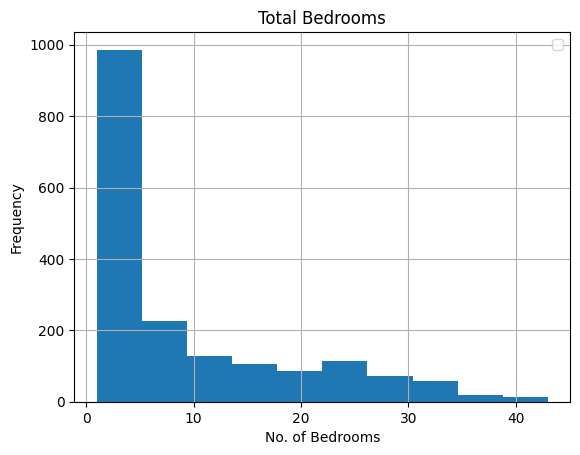

In [71]:
strat_trainSet['total_bedrooms'].value_counts().hist()
plt.legend()
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.title('Total Bedrooms')
plt.show()

Plot shows the presence of outliers<br>

since outliers can potentially bias the mean, therefore, it is preferable to fill missing values 
with the median instead of the mean<br>

median is less affected by outliers because it represents the middle value of a sorted dataset

In [72]:
median = strat_trainSet["total_bedrooms"].median()
median

433.0

In [73]:
strat_trainSet["total_bedrooms"].fillna(median, inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\4208971703.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  strat_trainSet["total_bedrooms"].fillna(median, inplace = True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\4208971703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet["total_bedrooms"].fillna(median, inplace = True)

In [74]:
strat_trainSet.loc[isna_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,-117.96,34.03,35.0,2093.0,433.0,1755.0,403.0,3.4115,150400.0,1.0,0.0,0.0,0.0,0.0
6541,-118.05,34.04,33.0,1348.0,433.0,1098.0,257.0,4.2917,161200.0,1.0,0.0,0.0,0.0,0.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0,0.0,1.0,0.0,0.0,0.0
4743,-118.36,34.05,42.0,1372.0,433.0,674.0,271.0,2.8793,202100.0,1.0,0.0,0.0,0.0,0.0
15607,-116.66,32.79,13.0,843.0,433.0,918.0,152.0,6.2152,240600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,433.0,1808.0,1093.0,4.2297,425000.0,0.0,0.0,0.0,1.0,0.0
10761,-117.87,33.62,8.0,1266.0,433.0,375.0,183.0,9.8020,500001.0,1.0,0.0,0.0,0.0,0.0
7228,-118.16,34.01,40.0,1552.0,433.0,1919.0,427.0,2.2596,137500.0,1.0,0.0,0.0,0.0,0.0
9970,-122.48,38.50,37.0,3049.0,433.0,1287.0,439.0,4.3125,276500.0,0.0,1.0,0.0,0.0,0.0


------------------

## Scaling Features

In [75]:
strat_trainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,1.0,0.0,0.0,0.0,0.0


In [76]:
strat_trainSet.columns[:8]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [77]:
strat_trainSet_numeric = strat_trainSet[strat_trainSet.columns[:8]]

In [78]:
strat_trainSet_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000


<Axes: ylabel='Density'>

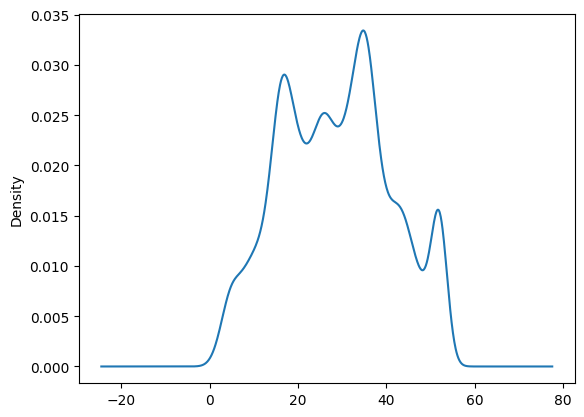

In [79]:
strat_trainSet['housing_median_age'].plot.kde()

In [80]:
strat_trainSet['housing_median_age'].min(), strat_trainSet['housing_median_age'].max()

(1.0, 52.0)

### Min-Max Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(strat_trainSet_numeric)
normalized = normalizer.transform(strat_trainSet_numeric)

In [82]:
normalized[:5]

array([[0.65587045, 0.1455898 , 0.29411765, 0.06185462, 0.07311967,
        0.06220096, 0.08866903, 0.25647232],
       [0.25910931, 0.58023379, 0.64705882, 0.07853909, 0.09534547,
        0.09722733, 0.10546948, 0.21461083],
       [0.65283401, 0.13390011, 0.43137255, 0.03474236, 0.06377839,
        0.11881978, 0.06664178, 0.17785962],
       [0.55465587, 0.17853348, 0.25490196, 0.0789969 , 0.07247544,
        0.09587781, 0.08082882, 0.39602212],
       [0.62753036, 0.15302869, 0.70588235, 0.03006257, 0.04654534,
        0.08078763, 0.0513347 , 0.12414312]])

In [83]:
normalized.shape

(16512, 8)

In [84]:
normalized_strat_trainSet = pd.DataFrame(normalized , columns = strat_trainSet.columns[:8] , index = strat_trainSet.index)
normalized_strat_trainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,0.655870,0.145590,0.294118,0.061855,0.073120,0.062201,0.088669,0.256472
1290,0.259109,0.580234,0.647059,0.078539,0.095345,0.097227,0.105469,0.214611
11221,0.652834,0.133900,0.431373,0.034742,0.063778,0.118820,0.066642,0.177860
20394,0.554656,0.178533,0.254902,0.078997,0.072475,0.095878,0.080829,0.396022
7336,0.627530,0.153029,0.705882,0.030063,0.046545,0.080788,0.051335,0.124143
...,...,...,...,...,...,...,...,...
14632,0.723684,0.027630,0.647059,0.123404,0.146722,0.127960,0.159231,0.231328
8945,0.595142,0.156217,0.509804,0.045272,0.075697,0.051159,0.078589,0.225707
16080,0.188259,0.552604,1.000000,0.062058,0.072153,0.072690,0.081202,0.268341
16365,0.307692,0.582359,0.450980,0.105677,0.153004,0.167525,0.163898,0.158494


<Axes: ylabel='Density'>

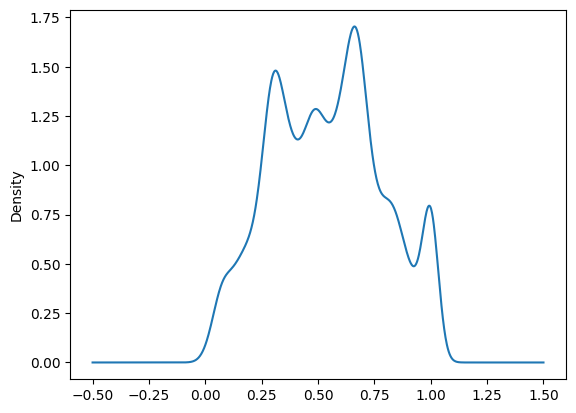

In [85]:
normalized_strat_trainSet['housing_median_age'].plot.kde()

In [86]:
normalized_strat_trainSet['housing_median_age'].min(), normalized_strat_trainSet['housing_median_age'].max()

(0.0, 0.9999999999999999)

### Standard Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(strat_trainSet_numeric)
standardized = standardizer.transform(strat_trainSet_numeric)

In [88]:
standardized[:5]

array([[ 0.8568401 , -0.81341049, -1.00539266, -0.08842458, -0.19172699,
        -0.36987978, -0.0573486 ,  0.18360453],
       [-1.0965938 ,  1.09618024,  0.4273443 ,  0.21736562,  0.14220396,
         0.15400624,  0.18053023, -0.13593062],
       [ 0.84189035, -0.86476867, -0.44821717, -0.58533365, -0.33207478,
         0.47696224, -0.36923419, -0.41645825],
       [ 0.35851512, -0.66867378, -1.16458565,  0.22575621, -0.20140615,
         0.13382149, -0.16835873,  1.2488094 ],
       [ 0.71730911, -0.78072801,  0.6661338 , -0.67110407, -0.59099226,
        -0.09188072, -0.58596824, -0.82648448]])

In [89]:
standardized.shape

(16512, 8)

In [90]:
standardized_strat_trainSet = pd.DataFrame(standardized , columns = strat_trainSet.columns[:8] , index = strat_trainSet.index)
standardized_strat_trainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484
...,...,...,...,...,...,...,...,...
14632,1.190718,-1.331661,0.427344,1.039643,0.914117,0.613668,0.941743,-0.008327
8945,0.557845,-0.766721,-0.129831,-0.392350,-0.153010,-0.535028,-0.200076,-0.051230
16080,-1.445421,0.974788,1.860081,-0.084695,-0.206246,-0.212989,-0.163073,0.274201
16365,-0.857398,1.105518,-0.368621,0.714741,1.008489,1.205448,1.007820,-0.564276


<Axes: ylabel='Density'>

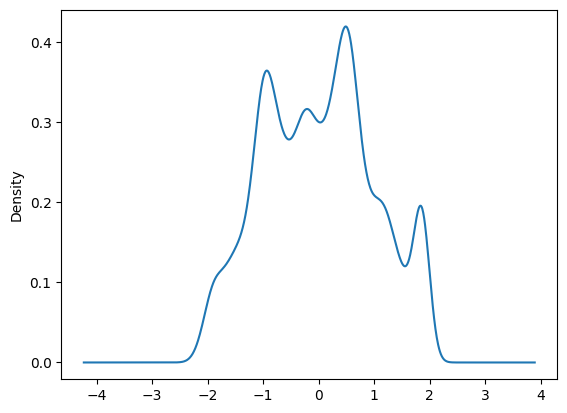

In [91]:
standardized_strat_trainSet['housing_median_age'].plot.kde()

In [92]:
standardized_strat_trainSet['housing_median_age'].min(), standardized_strat_trainSet['housing_median_age'].max()

(-2.1993401227780107, 1.8600812615063895)

In [93]:
standardized_strat_trainSet['housing_median_age'].mean()

-2.0978051337393947e-17

In [94]:
standardized_strat_trainSet['housing_median_age'].std()

1.0000302823832306

In [95]:
strat_trainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,1.0,0.0,0.0,0.0,0.0


In [96]:
strat_trainSet[strat_trainSet.columns[:8]] = standardized_strat_trainSet
strat_trainSet.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2184\1727908114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[strat_trainSet.columns[:8]] = standardized_strat_trainSet


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931,124700.0,0.0,1.0,0.0,0.0,0.0
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458,350000.0,1.0,0.0,0.0,0.0,0.0
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809,305400.0,1.0,0.0,0.0,0.0,0.0
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484,165600.0,1.0,0.0,0.0,0.0,0.0


In [97]:
strat_trainSet.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Modeling

Preparing X_train and y_train

In [98]:
X_train = strat_trainSet.drop("median_house_value",axis=1)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605,1.0,0.0,0.0,0.0,0.0
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931,0.0,1.0,0.0,0.0,0.0
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458,1.0,0.0,0.0,0.0,0.0
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809,1.0,0.0,0.0,0.0,0.0
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484,1.0,0.0,0.0,0.0,0.0


In [99]:
y_train = strat_trainSet["median_house_value"]
y_train.head()

10237    176300.0
1290     124700.0
11221    350000.0
20394    305400.0
7336     165600.0
Name: median_house_value, dtype: float64

### Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = lin_reg.predict(X_train)
y_pred

array([229340.20248966, 175410.14313168, 145051.29529851, ...,
       292385.1920959 , 117038.24836439, 148143.69859392])

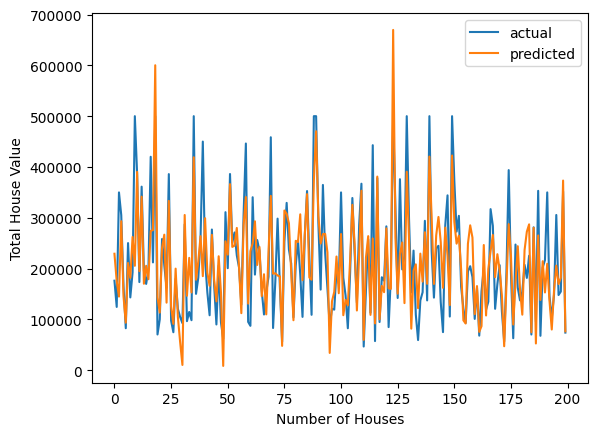

In [102]:
plt.plot(np.array(y_train)[:200], label='actual')
plt.plot(y_pred[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

Calculating Error between actual and predicted

In [103]:
def rmse(y_actual, y_pred):
    sum = 0
    for ac,pr in zip(y_actual, y_pred):
        sum += (ac-pr)**2
    sum = sum/len(y_train)
    return np.sqrt(sum)

In [104]:
rmse(y_train, y_pred)

68629.36013325192

Root Mean Squared Error using sk-learn

In [105]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_train, y_pred, squared = False)
lin_rmse

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68629.36013325187

### Decision Trees

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
y_pred_2 = tree_reg.predict(X_train)
y_pred_2

array([176300., 124700., 350000., ..., 317700.,  92100., 187500.])

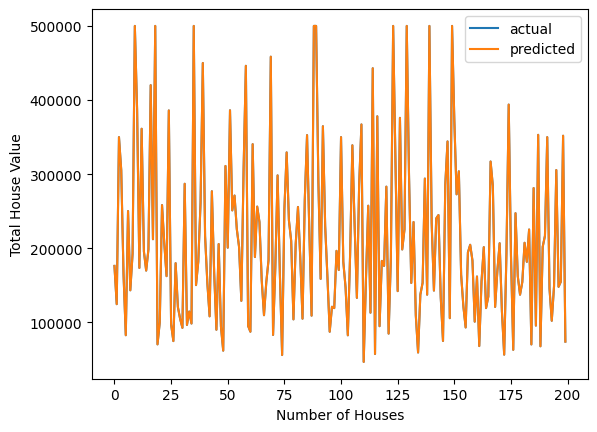

In [108]:
plt.plot(np.array(y_train)[:200], label='actual')
plt.plot(y_pred_2[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error

tree_rmse = mean_squared_error(y_train, y_pred_2,squared = False)
tree_rmse

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

## Cross-validation 
<p>Cross-validation involves splitting the dataset into multiple subsets (folds)</p> 

### Using Decision Tree

Scoring parameter specifies the metric used to evaluate the performance of the model<br>
"neg_mean_squared_error" indicates that MSE will be used as the scoring metric for evaluating the model's performance.

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, 
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [111]:
# an array of RMSE scores for each fold of the cross-validation process
tree_rmse_scores

array([67404.9868929 , 74042.91217762, 68447.84788695, 64999.73754343,
       73199.67146543, 66906.9701638 , 66643.8387405 , 70281.07825319,
       70519.84622855, 68024.57938871])

In [112]:
def display_scores(scores):
    print("Scores:", scores, "\n")
    print("Mean:", scores.mean(), "\n")
    print("Standard deviation:", scores.std(), "\n")


In [113]:
display_scores(tree_rmse_scores)

Scores: [67404.9868929  74042.91217762 68447.84788695 64999.73754343
 73199.67146543 66906.9701638  66643.8387405  70281.07825319
 70519.84622855 68024.57938871] 

Mean: 69047.14687410968 

Standard deviation: 2770.050957196754 



### Using Linear Regression

In [114]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

In [115]:
lin_rmse_scores

array([67925.80959681, 71999.26592206, 68901.56784759, 65085.99987584,
       69039.24578711, 67036.81378049, 70853.03611733, 70783.96351569,
       66923.40491897, 68601.73544865])

In [116]:
display_scores(lin_rmse_scores)

Scores: [67925.80959681 71999.26592206 68901.56784759 65085.99987584
 69039.24578711 67036.81378049 70853.03611733 70783.96351569
 66923.40491897 68601.73544865] 

Mean: 68715.08428105428 

Standard deviation: 1990.2152675071768 



### Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=10, random_state=42)

In [118]:
y_pred_3 = forest_reg.predict(X_train)
y_pred_3

array([187580., 131678., 279531., ..., 320688.,  98752., 182429.])

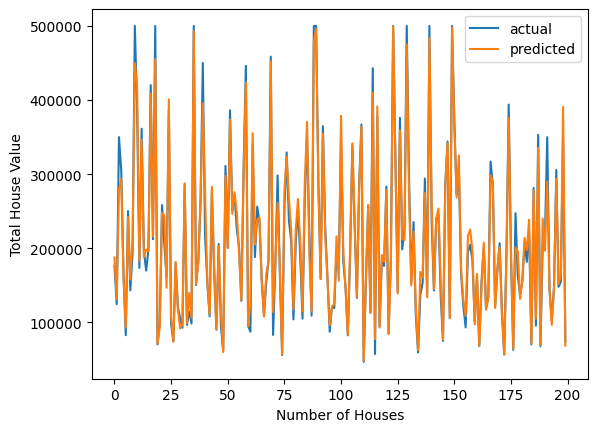

In [119]:
plt.plot(np.array(y_train)[:200], label='actual')
plt.plot(y_pred_3[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [ ]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
forest_rmse_scores

In [ ]:
display_scores(forest_rmse_scores)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': list(range(1,101)),
          'max_features': list(range(1,9))}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42,verbose=1)

rnd_search.fit(X_train, y_train)

In [ ]:
rnd_search.cv_results_

In [ ]:
randomSearch_results = rnd_search.cv_results_

In [ ]:
result_df = pd.DataFrame(randomSearch_results)
result_df

In [ ]:
result_df[['params', 'mean_test_score']]

In [ ]:
result_df['params'][result_df['mean_test_score'].argmax()]

In [ ]:
rnd_search.best_estimator_

In [ ]:
feature_imp = rnd_search.best_estimator_.feature_importances_
feature_imp

In [ ]:
rnd_search.best_estimator_.feature_importances_.argmax()

In [ ]:
X_train.columns[rnd_search.best_estimator_.feature_importances_.argmax()]

In [ ]:
final_model = rnd_search.best_estimator_

Joblib Library - Used to serialize (save) a trained machine learning model to a file and later deserialize (load) it back into memory

In [ ]:
import joblib
joblib.dump(final_model, "final_model.pkl")

In [ ]:
final_model = joblib.load("final_model.pkl")
final_model

---------------

## Test Data PreProcessing 

In [ ]:
# 1. Apply One Hot Encoding to test dataset

In [ ]:
# 2. Handle Missing Values od test dataset using the median of training data

In [ ]:
# 3. Apply Standardized scaling by using the previously created object at the training time and apply only transform method

In [ ]:
# 4. Prepare X_test and y_test out of the test dataset

In [ ]:
# 5. Use X_test for making prdictions on saved final model

In [ ]:
# 6. Calculate MSE

#### One Hot Encoding

In [ ]:
strat_testSet_cat_array = np.array(strat_testSet_category).reshape(-1,1)

In [ ]:
strat_testSet_cat_encoder = category_encoder.fit_transform(strat_testSet_cat_array)

In [ ]:
category_encoder.categories_[0]

In [ ]:
strat_testSet_cat_encoder

In [ ]:
strat_testSet_cat_encoder.toarray()

In [ ]:
strat_testSet[category_encoder.categories_[0]] = strat_testSet_cat_encoder.toarray()

In [ ]:
strat_testSet.head()

In [ ]:
strat_testSet.drop('ocean_proximity', axis=1, inplace=True)

In [ ]:
strat_testSet.head()

#### Filling Missing Values

In [ ]:
strat_testSet.isna()

In [ ]:
strat_testSet.isna().sum()

In [ ]:
df_null = strat_testSet.isna()

In [ ]:
df_null[df_null['total_bedrooms'] == True]

In [ ]:
isna_index = (df_null[df_null['total_bedrooms']==True]).index
isna_index

In [ ]:
strat_testSet.loc[isna_index]

In [ ]:
median

In [ ]:
strat_testSet["total_bedrooms"].fillna(median, inplace = True)

In [ ]:
strat_testSet.loc[isna_index]

#### Scaling features

In [ ]:
strat_testSet.columns[:8]

In [ ]:
strat_testSet['housing_median_age'].plot.kde()

In [ ]:
strat_testSet_numeric = strat_testSet[strat_testSet.columns[:8]]

In [ ]:
standardized = standardizer.transform(strat_testSet_numeric)

In [ ]:
standardized[:5]

In [ ]:
standardized.shape

In [ ]:
standardized_strat_testSet = pd.DataFrame(standardized , columns = strat_testSet.columns[:8] , index = strat_testSet.index)
standardized_strat_testSet

In [ ]:
standardized_strat_testSet['housing_median_age'].plot.kde()

In [ ]:
standardized_strat_testSet['housing_median_age'].min(), standardized_strat_testSet['housing_median_age'].max()

In [ ]:
standardized_strat_testSet['housing_median_age'].mean()

In [ ]:
standardized_strat_testSet['housing_median_age'].std()

In [ ]:
strat_testSet[strat_testSet.columns[:8]] = standardized_strat_testSet
strat_testSet.head()

In [ ]:
strat_testSet.isna().sum()

In [ ]:
X_test = strat_testSet.drop("median_house_value", axis=1)

In [ ]:
X_test

In [ ]:
y_test = strat_testSet["median_house_value"]

In [ ]:
y_test

In [ ]:
finalPred = final_model.predict(X_test)

In [ ]:
finalPred

In [ ]:
plt.plot(np.array(y_test)[:200], label='actual')
plt.plot(finalPred[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [ ]:
final_rmse = mean_squared_error(y_test, finalPred, squared = False)
final_rmse

In [ ]:
Actual_Predicted_DataFrame = pd.DataFrame({'Actual':y_test, 'Predicted':finalPred})

In [ ]:
Actual_Predicted_DataFrame